<a href="https://colab.research.google.com/github/Nischay-verma/mobile_price_prediction/blob/main/mobile_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobile Price Prediction using Classification


## Importing Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Dataset

In [27]:
df = pd.read_csv("https://raw.githubusercontent.com/Nischay-verma/mobile_price_prediction/main/mobile_train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/Nischay-verma/mobile_price_prediction/main/mobile_test.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Checking the dataset

In [28]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [29]:
df.shape

(2000, 21)

In [30]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [32]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Exploratory Data Analysis (EDA)

In [33]:
df['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

In [34]:
df['dual_sim'].value_counts()

1    1019
0     981
Name: dual_sim, dtype: int64

<Axes: xlabel='price_range', ylabel='ram'>

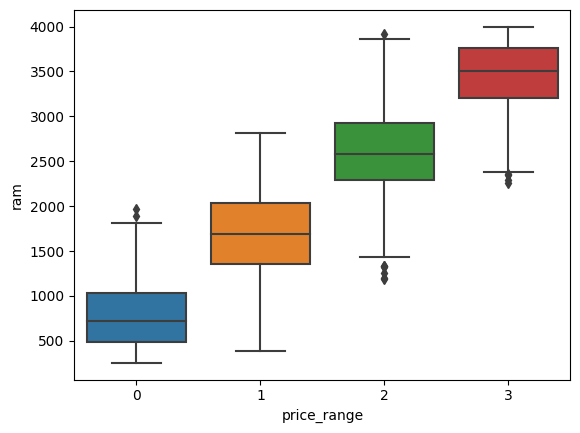

In [35]:
sns.boxplot(x='price_range', y ='ram', data=df)

<Axes: xlabel='price_range', ylabel='battery_power'>

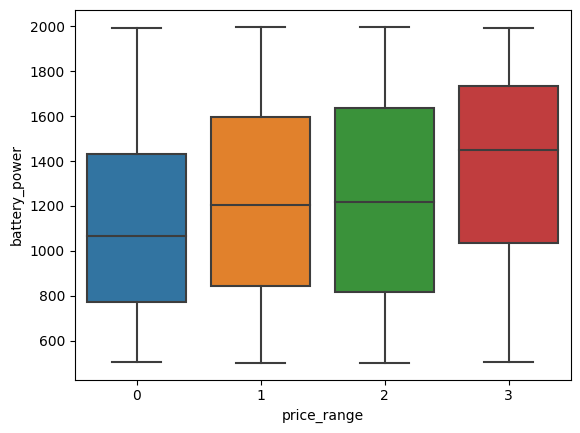

In [36]:
sns.boxplot(x='price_range', y ='battery_power', data=df)


<Axes: xlabel='n_cores', ylabel='price_range'>

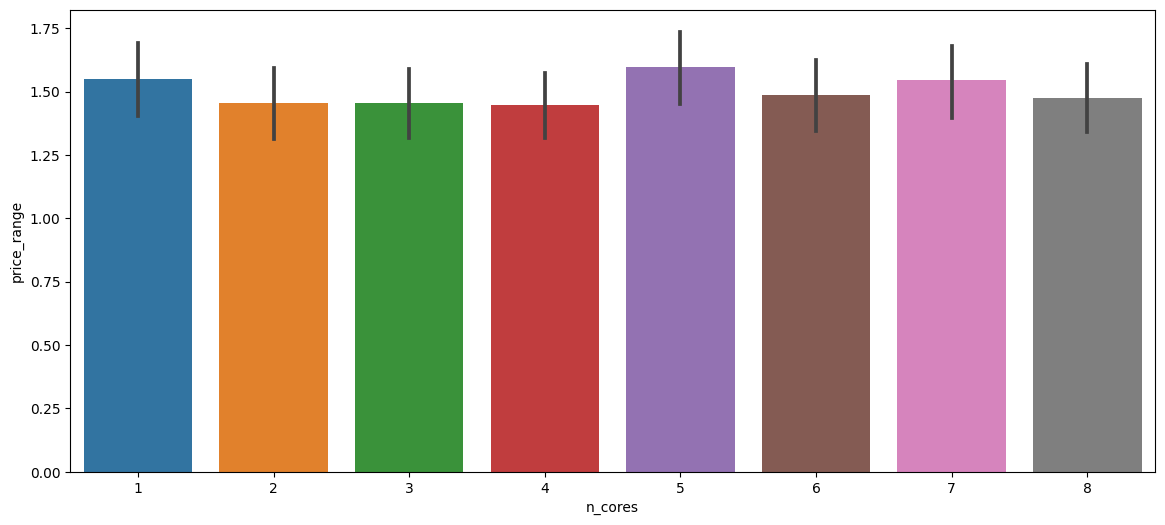

In [37]:
plt.figure(figsize=(14,6))
sns.barplot(x = "n_cores", y = "price_range", data = df)


Text(0.5, 1.0, 'Dual Sim or Not')

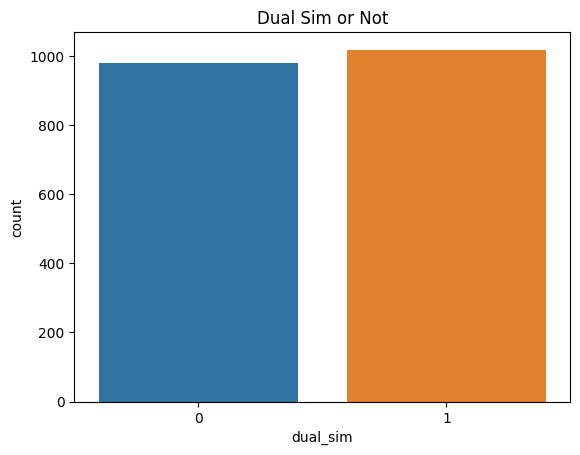

In [38]:

sns.countplot(x='dual_sim', data=df)
plt.title("Dual Sim or Not")

Text(0.5, 1.0, '4G phones')

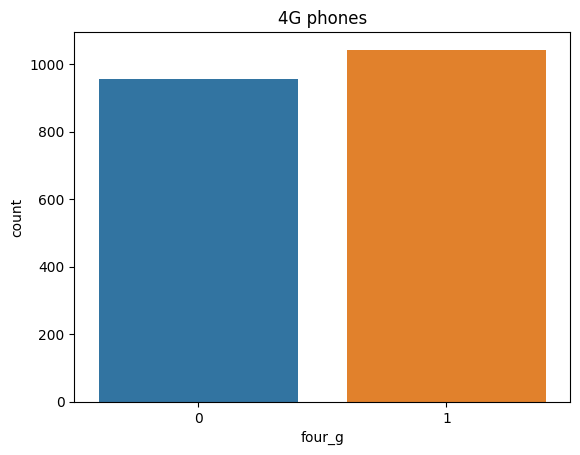

In [39]:
sns.countplot(x='four_g', data =df)
plt.title("4G phones")


Text(0.5, 1.0, '3G phones')

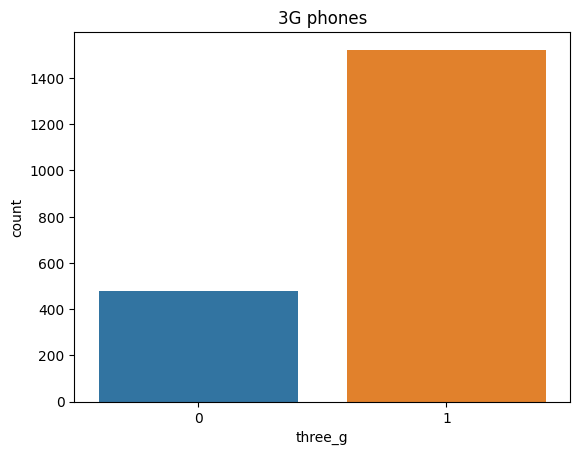

In [40]:
sns.countplot(x='three_g', data =df)
plt.title("3G phones")

## Comparing all the features

<Axes: xlabel='wifi', ylabel='count'>

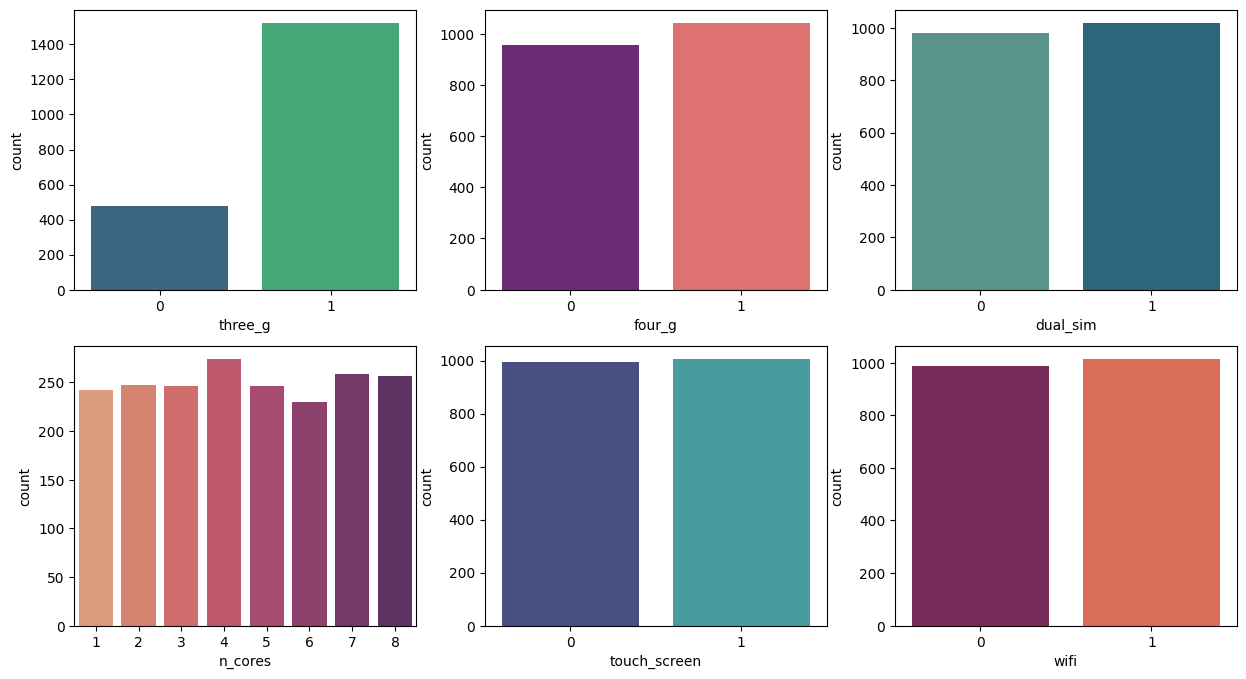

In [41]:
fig, axes = plt.subplots(2, 3, figsize = (15,8))
sns.countplot(ax=axes[0,0], x='three_g',data=df, palette='viridis' )
sns.countplot(ax=axes[0,1], x='four_g',data=df, palette='magma' )
sns.countplot(ax=axes[0,2], x='dual_sim',data=df, palette='crest' )
sns.countplot(ax=axes[1,0], x='n_cores',data=df, palette='flare' )
sns.countplot(ax=axes[1,1], x='touch_screen',data=df, palette='mako' )
sns.countplot(ax=axes[1,2], x='wifi',data=df, palette='rocket' )

## Split the dataset

In [42]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [43]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature', 'Score']
feature_scores

,Feature,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


### Getting Top 10 Feature

In [44]:
top_features = feature_scores.nlargest(10, 'Score')
top_features

,Feature,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


## Assigning Top feature to X

In [45]:
X = X[top_features['Feature']]
X.head()


,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,fc,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8


## Scaling the data

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

# Apply ML models

In [48]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
     

## Prediction, Accuracy, CLassificartion_report, Confusion_matrix of models

In [49]:
algorithms = [
    'Logistic Regression', LogisticRegression(),
    "KNN", KNeighborsClassifier(n_neighbors=5),
    "Linear SVM", SVC(kernel="linear"),
    "Gradient Boosting", GradientBoostingClassifier(learning_rate=0.10, n_estimators=100),
    "Decision Tree", DecisionTreeClassifier(criterion= "entropy", random_state=0),
    "Random_Forest", RandomForestClassifier(n_estimators=100, random_state=0),
    "Naive Bayes", GaussianNB()]
global accuracy_list
accuracy_list = []
global model
model = []
for i in range(0, len(algorithms), 2):
    name = algorithms[i].upper()
    algorithm = algorithms[i + 1]
    algo = algorithm.fit(X_train, y_train)
    y_pred = algo.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    model.append(name)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)


    
    print(f"{i+1}:-Confusion matrix for {name}")
    print(cm)
    print(f"Accuracy Score for  {name} : {accuracy * 100}")
    print(f"Classification Report for {name}")
    print(cr)


1:-Confusion matrix for LOGISTIC REGRESSION
[[ 97   1   0   0]
 [  6 101   2   0]
 [  0   1  91   2]
 [  0   0   1  98]]
Accuracy Score for  LOGISTIC REGRESSION : 96.75
Classification Report for LOGISTIC REGRESSION
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        98
           1       0.98      0.93      0.95       109
           2       0.97      0.97      0.97        94
           3       0.98      0.99      0.98        99

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

3:-Confusion matrix for KNN
[[81 17  0  0]
 [28 61 20  0]
 [ 1 27 58  8]
 [ 0  2 19 78]]
Accuracy Score for  KNN : 69.5
Classification Report for KNN
              precision    recall  f1-score   support

           0       0.74      0.83      0.78        98
           1       0.57      0.56      0.56       109
           2       0.60      0.62    

## Visualization of Accuracy of Classification models

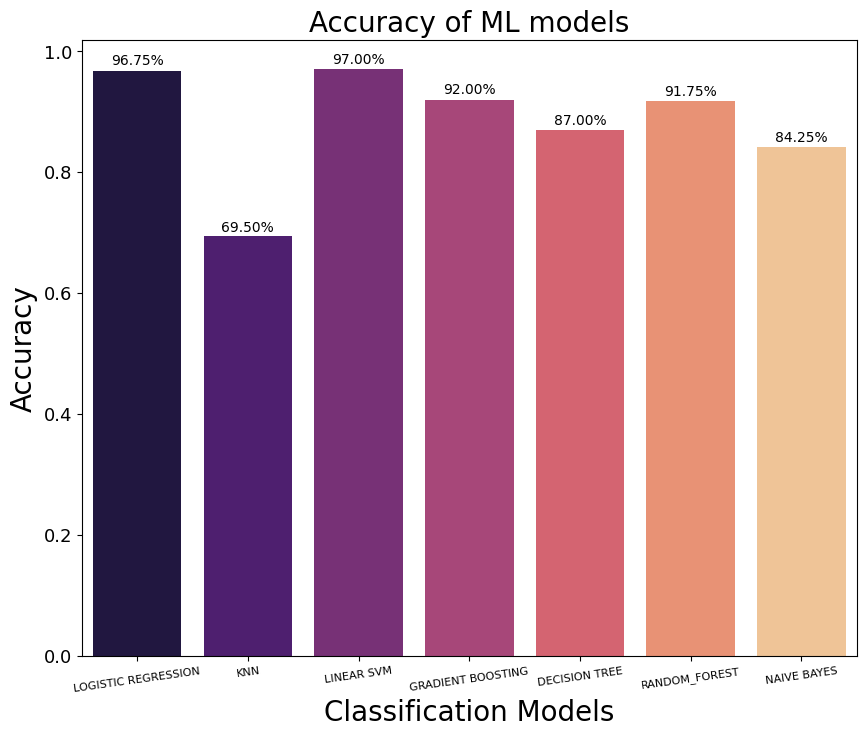

In [50]:
plt.figure(figsize= (10,8))
ax = sns.barplot(x=model, y=accuracy_list, palette= "magma")
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of ML models", fontsize = 20)
plt.xticks(fontsize = 8, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
  width, height = p.get_width(), p.get_height()
  x, y = p.get_xy()
  ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.01), ha='center',)
plt.show()